# 1. Deep Learning Primer </br>
https://m2dsupsdlclass.github.io/lectures-labs/slides/02_backprop/index.html#4

# 2. Text sequence Prediction with deep learning- LSTM

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
file = open("metamorphosis_clean.txt", "r", encoding = "utf8")
lines = " "

for text in file:
    lines+=text
    
print("The First Line: ", lines[0:100])

The First Line:   ﻿One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed 


In [8]:
tokens = word_tokenize(lines)


In [9]:
train_len = 3+1
text_sequences = []
for i in range(train_len,len(tokens)):
    seq = tokens[i-train_len:i]
    text_sequences.append(seq)
sequences = {}
count = 1
for i in range(len(tokens)):
    if tokens[i] not in sequences:
        sequences[tokens[i]] = count
        count += 1
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences) 

#Collecting some information   
vocabulary_size = len(tokenizer.word_counts)+1

n_sequences = np.empty([len(sequences),train_len], dtype='int32')
for i in range(len(sequences)):
    n_sequences[i] = sequences[i]

In [10]:
train_inputs = n_sequences[:,:-1]
train_targets = n_sequences[:,-1]
train_targets = to_categorical(train_targets, num_classes=vocabulary_size)
seq_len = train_inputs.shape[1]
train_inputs.shape
#print(train_targets[0])

(24933, 3)

In [11]:
train_targets[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [14]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
#model = load_model("mymodel.h5")

model = Sequential()
model.add(Embedding(vocabulary_size, seq_len, input_length=seq_len))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(50,activation='relu'))
model.add(Dense(vocabulary_size, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_inputs,train_targets,epochs=10,verbose=1)
model.save("mymodel.h5")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3, 3)              7803      
                                                                 
 lstm_4 (LSTM)               (None, 3, 50)             10800     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 2601)              132651    
                                                                 
Total params: 174,004
Trainable params: 174,004
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
780/780 [=======================

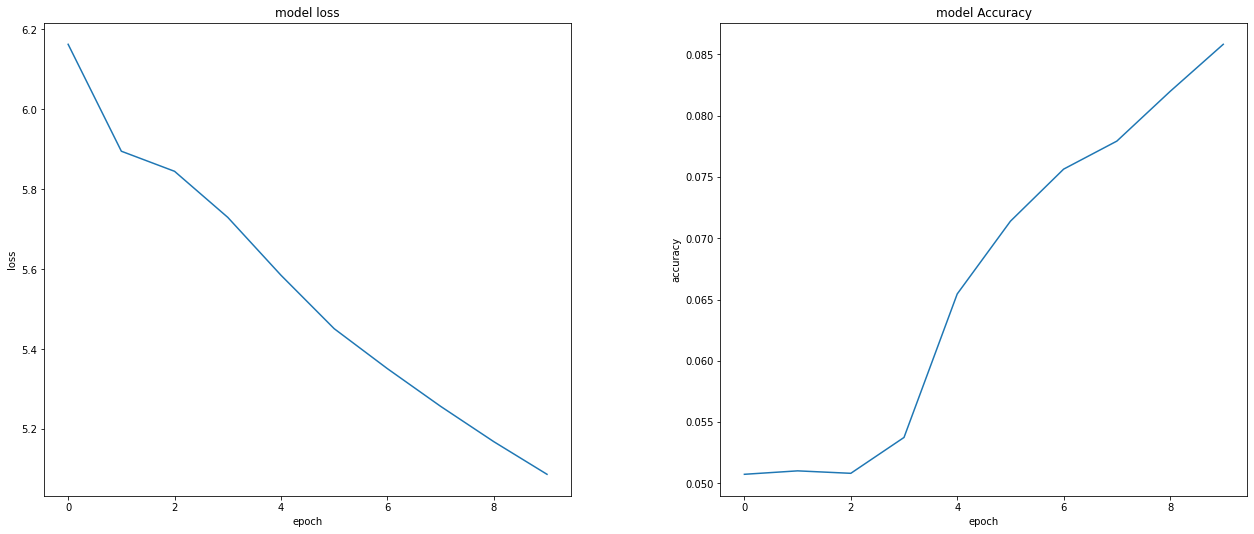

In [15]:
# Plotting the loss and accuracy achieved by the model in each epoch
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
ax[0].plot(history.history['loss'])
ax[1].plot(history.history['accuracy'])
ax[0].set_title('model loss')
ax[1].set_title('model Accuracy')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
fig.tight_layout(pad=10.0)
plt.show()

In [16]:
from keras.preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
print(encoded_text, pad_encoded)
for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:",pred_word)

I get up from
[50, 81, 54, 35] [[81 54 35]]
Next word suggestion: the
Next word suggestion: he
Next word suggestion: was


Reference:  https://towardsdatascience.com
https://towardsdatascience.com/exploring-the-next-word-predictor-5e22aeb85d8f#:~:text=LSTM%20model%20uses%20Deep%20learning,neural%20networks%20and%20other%20models.&text=The%20next%20word%20is%20simply,by%20most%20models%20and%20networks.